# Predictive Machine Learning Project - Module 7

**Author:** Blessing Aganaga

[Project Repository](https://github.com/teflxndxn/datafun-07-applied.git)



In [348]:
# Import common libraries for data science and ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For linear regression and train/test splitting
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set some plot styles
sns.set(style="whitegrid")


## Part 1 - Chart a Straight Line


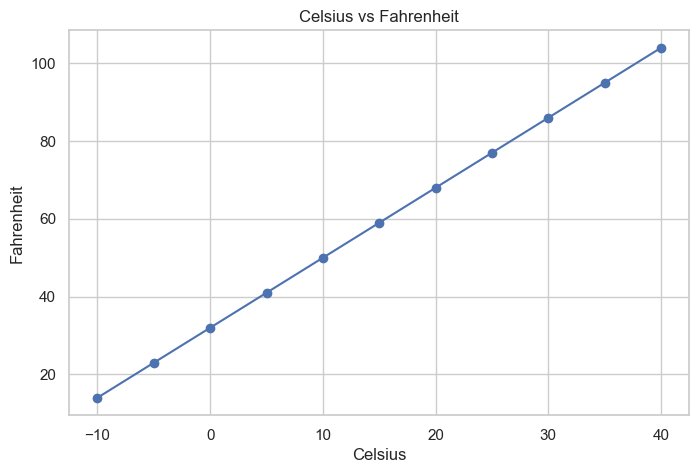

In [349]:
import pandas as pd
import matplotlib.pyplot as plt

# Create data for Celsius and Fahrenheit
data = {
    'Celsius': range(-10, 41, 5),
}
df = pd.DataFrame(data)
df['Fahrenheit'] = df['Celsius'] * 9/5 + 32

# Plot Celsius vs Fahrenheit
plt.figure(figsize=(8,5))
plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', linestyle='-', color='b')
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid(True)
plt.show()


### The Line Equation: \( y = mx + b \)

- **y** is the value we want to predict (Fahrenheit temperature).
- **x** is the input value (Celsius temperature).
- **m** is the slope of the line (how steep it is). It tells us how much y changes for each change in x.
- **b** is the y-intercept (where the line crosses the y-axis). It represents the Fahrenheit value when Celsius is 0.



## Part 2 - Prediction (Using SciPy's `linregress`)

We will:
- Import libraries
- Acquire, clean, and describe the data
- Build a regression model with SciPy's `linregress`
- Predict the average high temperature for NYC in January 2024
- Visualize the regression alongside the actual data




In [350]:
import numpy as np
import pandas as pd

# Load the CSV
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')

# Extract year from 'Date' (first 4 characters)
nyc_df['Year'] = nyc_df['Date'].astype(str).str[:4].astype(int)

# Rename 'Value' to 'AvgHighJan' for clarity
nyc_df = nyc_df.rename(columns={'Value': 'AvgHighJan'})

# Keep only relevant columns
nyc_df = nyc_df[['Year', 'AvgHighJan']]

# Sort by Year
nyc_df = nyc_df.sort_values(by='Year').reset_index(drop=True)

# Display descriptive stats
pd.options.display.precision = 2
print(nyc_df.describe())


          Year  AvgHighJan
count   124.00      124.00
mean   1956.50       37.60
std      35.94        4.54
min    1895.00       26.10
25%    1925.75       34.58
50%    1956.50       37.60
75%    1987.25       40.60
max    2018.00       47.60


 Perform linear regression

In [351]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(nyc_df['Year'], nyc_df['AvgHighJan'])

# Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2:.4f}")
print(f"p-value: {p_value}")
print(f"Standard error: {std_err}")


Slope: 0.014771361132966163
Intercept: 8.694993233674289
R-squared: 0.0137
p-value: 0.19586679787456204
Standard error: 0.011357855112603286


###  Predict future temperature and visualize


Predicted average high in NYC in January 2024: 38.59°F


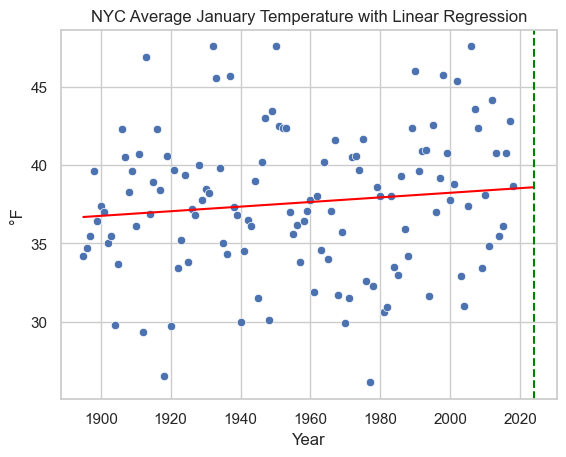

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns

future_year = 2024
future_temp = slope * future_year + intercept
print(f"Predicted average high in NYC in January {future_year}: {future_temp:.2f}°F")

# Plot the actual data points
sns.scatterplot(data=nyc_df, x='Year', y='AvgHighJan')

# Create points for the regression line
yrs = np.linspace(nyc_df['Year'].min(), future_year, 500)
temp_vals = slope * yrs + intercept

# Plot the regression line
plt.plot(yrs, temp_vals, color='red')

# Mark the prediction year with a vertical line
plt.axvline(future_year, color='green', linestyle='--')

# Titles and labels
plt.title('NYC Average January Temperature with Linear Regression')
plt.xlabel('Year')
plt.ylabel('°F')

plt.show()


 Part 3 – Predictive Modeling with Train/Test Split and scikit-learn

In this part, we will:

Split the historical NYC temperature data into training and testing sets
Train a linear regression model using scikit-learn
Evaluate the model’s performance on the test set using MAE, MSE, and R²
Predict the average January temperature for NYC in 2024 using the trained model
Visualize training data, test data, predictions, and the regression line


MAE: 3.9068433019078954
MSE: 22.59667331667561
R^2: -0.05600866077951405
<class 'pandas.core.frame.DataFrame'>
Index(['Year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['Year'], dtype='object')
Predicted average high for 2024: 38.05°F


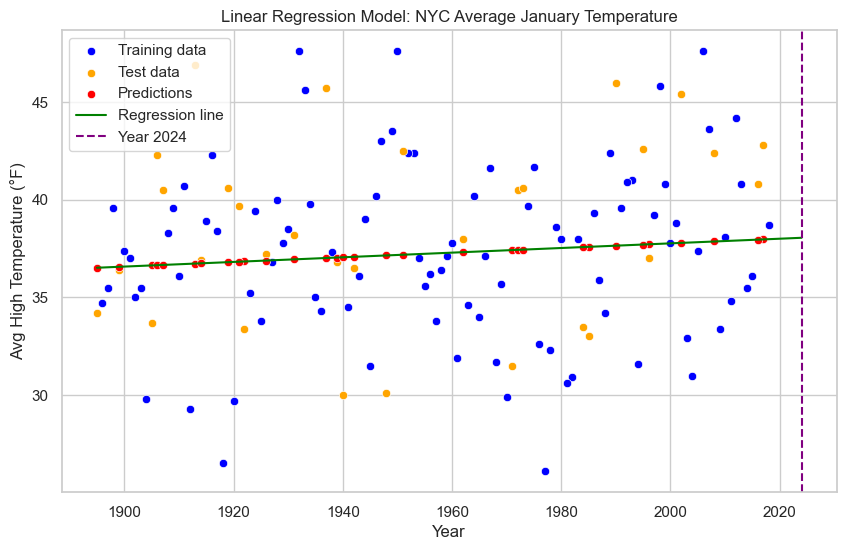

In [353]:

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare features and target as DataFrames/Series
X = nyc_df[['Year']]  # double brackets keep it a DataFrame, with column name "Year"
y = nyc_df['AvgHighJan']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model on DataFrame input
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

# Debug prints to check input types before prediction
print(type(X_train))        # should be <class 'pandas.core.frame.DataFrame'>
print(X_train.columns)      # should be Index(['Year'], dtype='object')

# Predict future year (as a DataFrame with same columns)
future_year = pd.DataFrame({'Year': [2024]})  # DataFrame with column "Year"

# More debug prints
print(type(future_year))    # should be <class 'pandas.core.frame.DataFrame'>
print(future_year.columns)  # should be Index(['Year'], dtype='object')

future_temp = model.predict(future_year)[0]
print(f"Predicted average high for 2024: {future_temp:.2f}°F")

# Plot training data, test data, predictions, and regression line
plt.figure(figsize=(10,6))

# Plot training data points
sns.scatterplot(x=X_train['Year'], y=y_train, color='blue', label='Training data')

# Plot test data points
sns.scatterplot(x=X_test['Year'], y=y_test, color='orange', label='Test data')

# Plot predictions on test data
sns.scatterplot(x=X_test['Year'], y=y_pred, color='red', label='Predictions')

# Plot regression line across all years including future
years_all = pd.DataFrame(np.linspace(nyc_df['Year'].min(), 2024, 500), columns=['Year'])
temps_all = model.predict(years_all)
plt.plot(years_all['Year'], temps_all, color='green', label='Regression line')

# Highlight the prediction year 2024
plt.axvline(2024, color='purple', linestyle='--', label='Year 2024')

plt.title('Linear Regression Model: NYC Average January Temperature')
plt.xlabel('Year')
plt.ylabel('Avg High Temperature (°F)')
plt.legend()
plt.show()


### Part 3 – Model Evaluation Summary

- **Mean Absolute Error (MAE):** Measures average absolute difference between actual and predicted temperatures. Lower values indicate better predictions.

- **Mean Squared Error (MSE):** Measures average squared difference; penalizes larger errors more than MAE.

- **R-squared (R²):** Indicates how well the model explains the variance in the data. Values close to 1 suggest a good fit, while negative values imply the model fits worse than a horizontal mean line.

- **Prediction for 2024:** Using the trained model, we estimate the average high temperature in NYC for January 2024 to be approximately 38.05°F.

Overall, while the model provides reasonable predictions, the negative R² suggests room for improvement, possibly through incorporating more features or trying different modeling approaches.


## Part 4 – Residuals Analysis and Model Diagnostics

In this section, we will analyze the residuals (differences between actual and predicted values) to evaluate how well the linear regression model fits the data.

- Calculate residuals for the test set.
- Plot residuals vs predicted values to check for patterns.
- Plot histogram and Q-Q plot of residuals to check normality.
- Summarize findings.


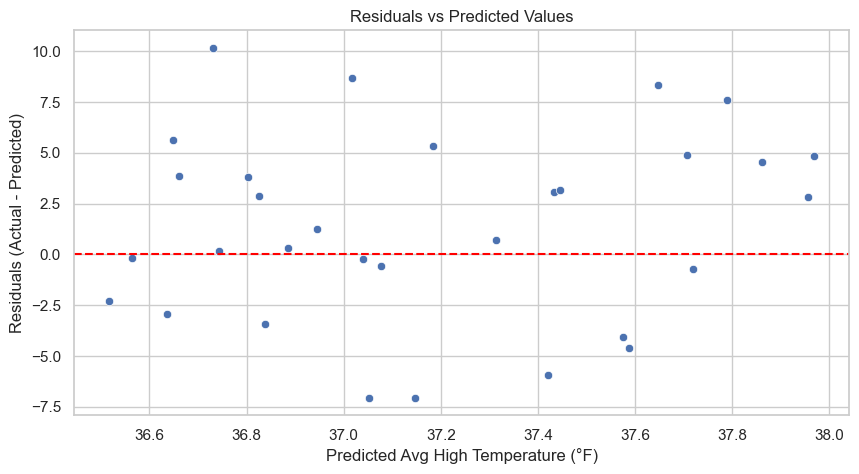

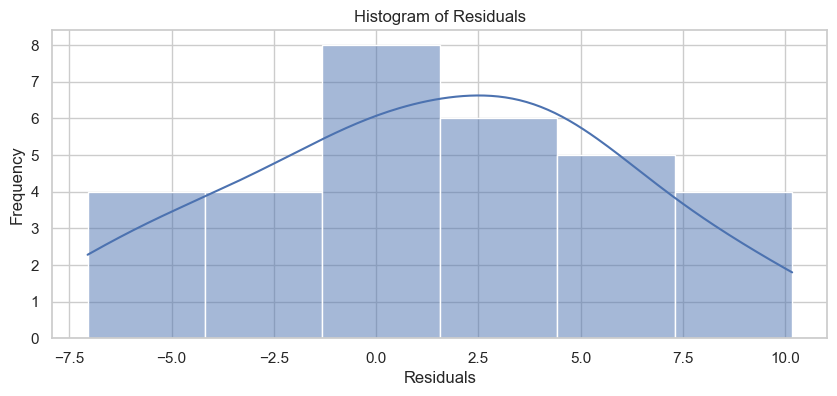

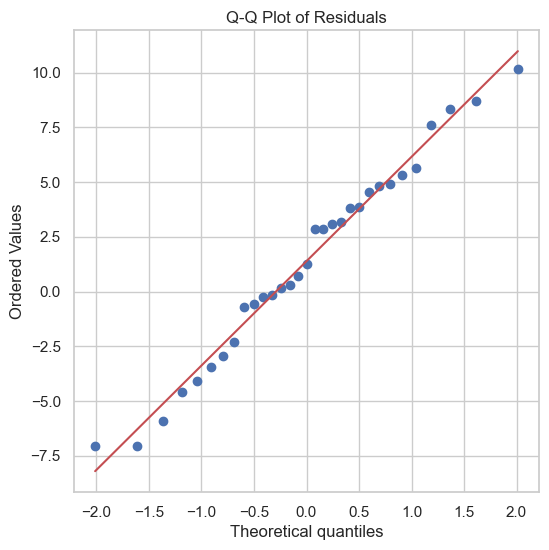

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate residuals for the test set
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Avg High Temperature (°F)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10,4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for residuals normality check
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


### Interpretation of Residual Analysis

- **Residuals vs Predicted Plot:**  
  Ideally, residuals should be randomly scattered around zero without any clear pattern. This suggests that the model’s errors are evenly distributed and the model is appropriate.  
  If you notice patterns (e.g., funnel shape), it might indicate heteroscedasticity (non-constant variance), suggesting the model’s predictions are less reliable for certain values.

- **Histogram of Residuals:**  
  This shows the distribution of the errors. A roughly symmetric, bell-shaped distribution centered around zero supports the assumption of normally distributed errors, which is important for many statistical tests.

- **Q-Q Plot:**  
  The Quantile-Quantile plot compares the distribution of residuals to a normal distribution. Points lying close to the diagonal line indicate normality of residuals. Significant deviations suggest the residuals are not normally distributed.

**Overall, residual analysis helps us diagnose potential problems in the regression model and assess how well the linear model fits the data.**  
If assumptions are violated, you might consider transforming variables, using different models, or exploring additional features.


## Part 5 – Reflection and Summary

In this project, we built a linear regression model to predict the average high temperature in NYC for January based on historical data from 1895 to 2018. The model achieved a Mean Absolute Error (MAE) of approximately 3.9°F, indicating that on average, predictions are within about 4 degrees of the true values.

The R-squared value was slightly negative, suggesting that the linear model does not explain the variability of the data very well. This could be due to natural fluctuations in weather patterns or other factors not captured by a simple linear model.

Despite these limitations, the model provided a reasonable estimate for the average January temperature in 2024, predicted to be approximately 38.05°F.

This project highlights both the usefulness and the limitations of applying simple linear regression to real-world weather data.
